<a href="https://colab.research.google.com/github/ShakilaMhd/MNIST-Dataset/blob/main/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the MNIST dataset...

Choosing Train and Validation Datasets...
Shuffling Train Data...
Normalizing Train and Valdiation Data...
Train Data Visualization...



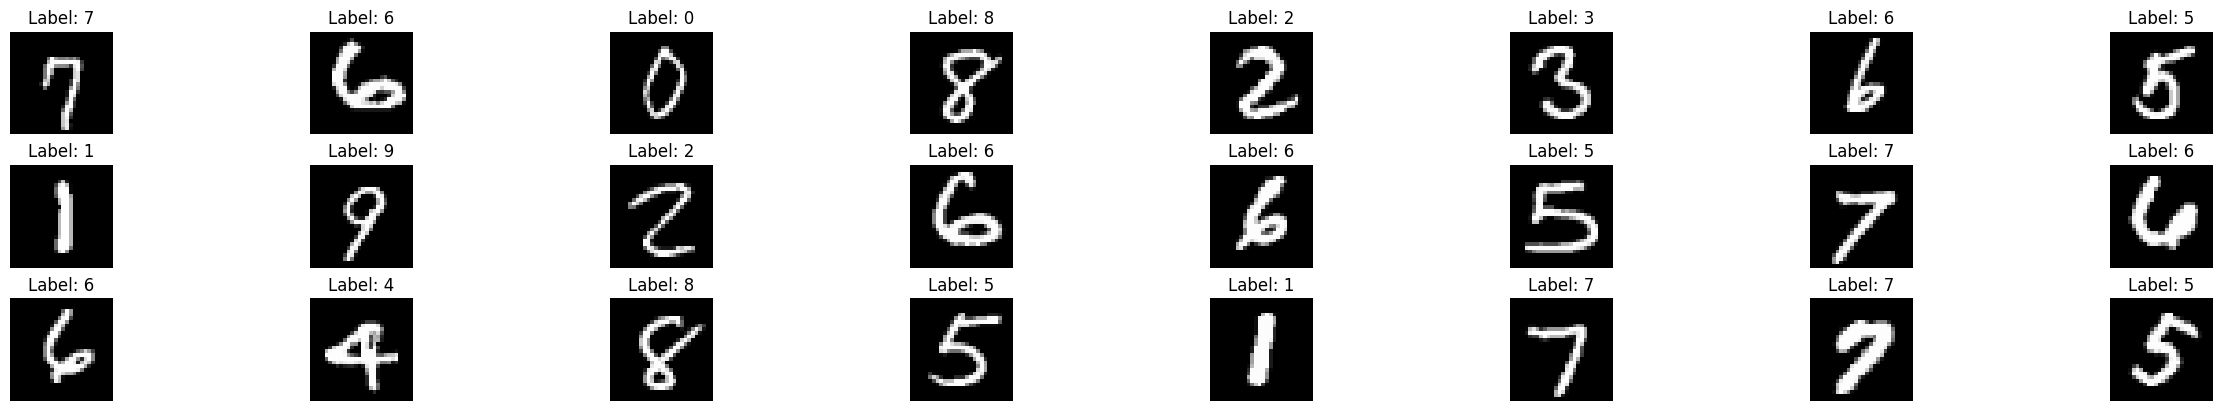

Validation Data Visualization...



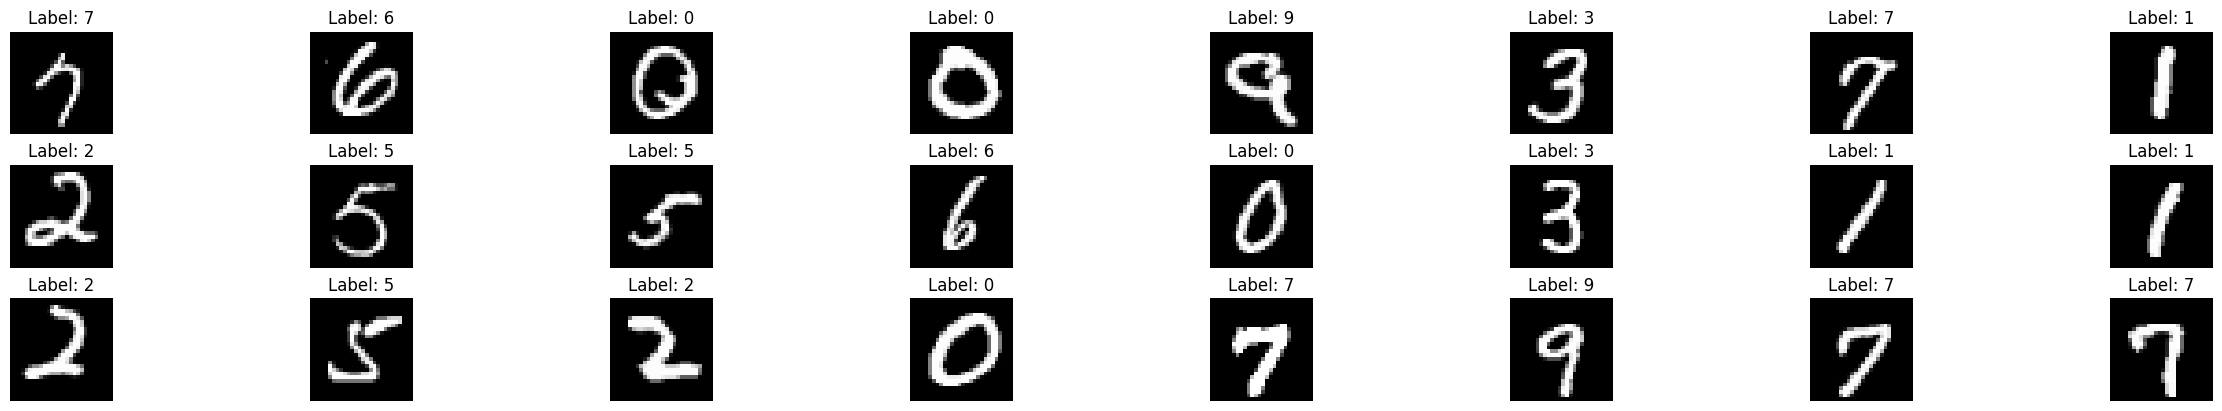



Initializing models...
Initializing done.


Training models...
Training KNeighborsClassifier model...
Accuracy on train data using KNeighborsClassifier: 0.9523
Accuracy of validation data using KNeighborsClassifier: 0.9142

Training SVC model...
Accuracy on train data using SVC: 0.9860
Accuracy of validation data using SVC: 0.9450

Training DecisionTreeClassifier model...
Accuracy on train data using DecisionTreeClassifier: 1.0000
Accuracy of validation data using DecisionTreeClassifier: 0.7542

Training RandomForestClassifier model...
Accuracy on train data using RandomForestClassifier: 1.0000
Accuracy of validation data using RandomForestClassifier: 0.9300

Initializing CNN model...
Initializing done.

Training CNN model...
Accuracy on train data using CNN: 0.9787

Normalizing Validation Data...
Accuracy of validation data using CNN: 0.9358

Selecting the best model on train_data...
The Best Model Detected Sucessfully!


Choosing Test Dataset...
Normalizing Test Data...
Test Data V

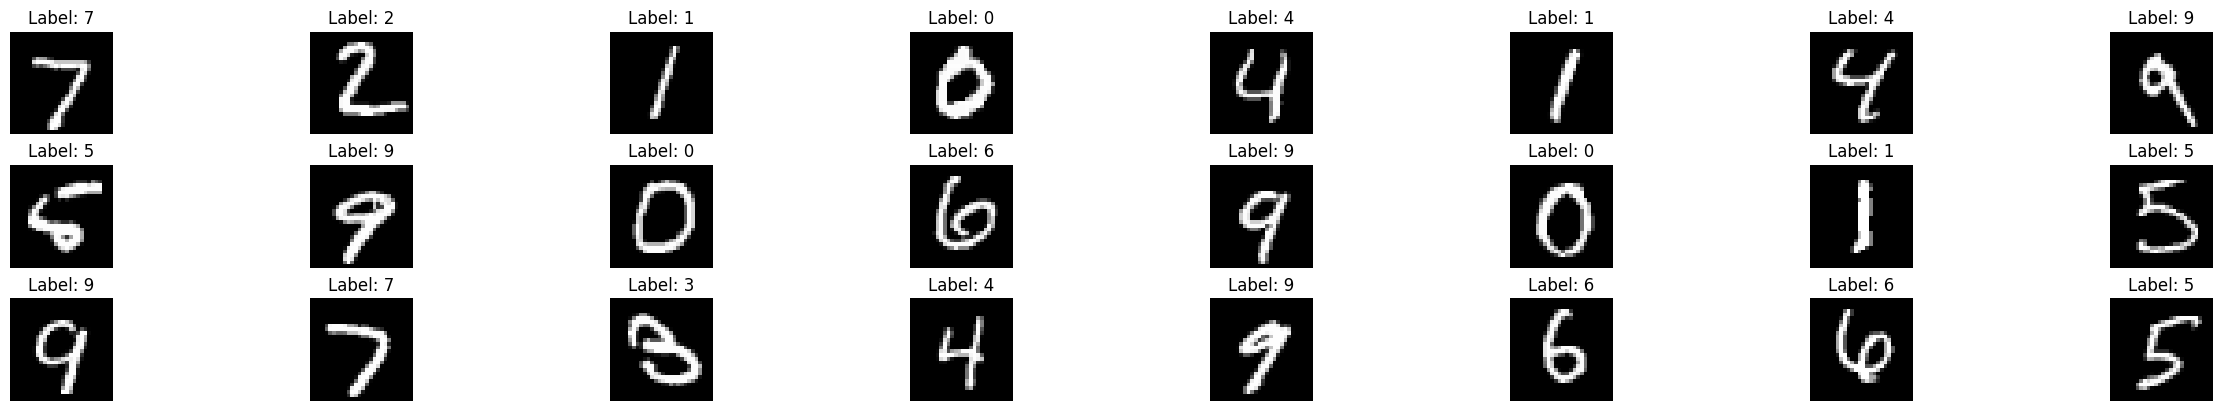



Accuracy on training data using the best model: SVC: 0.9450
Accuracy on test data using the best model: SVC: 0.9541


In [2]:

import warnings
from pprint import pprint
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


warnings.filterwarnings('ignore')

print(f"Loading the MNIST dataset...")
# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1, cache=True)

# Extract features and labels
X, y = mnist["data"][0:59999],  mnist["target"][0:59999].astype(int)
print(f"\nChoosing Train and Validation Datasets...")

# Select 4800 random training images
# Select another 1200 random images for validation
X_train, X_val, y_train, y_val = train_test_split(X, y,train_size=4800, test_size=1200, shuffle=True)

# Dumping variables
# pprint(vars(X_val))
# print(" -------------------------------------------------- ----- ---------------------------------------------")
# pprint(vars(X_train))

print(f"Shuffling Train Data...")

# Shuffle the training data
shuffle_index_train = np.random.permutation(4800)
X_train, y_train = X_train.iloc[shuffle_index_train], y_train.iloc[shuffle_index_train]

print(f"Normalizing Train and Valdiation Data...")
# Reshape and normalize the training data
X_train = X_train.values.reshape(-1, 28, 28, 1) / 255.0
X_val = X_val.values.reshape(-1, 28, 28, 1) / 255.0


print(f"Train Data Visualization...\n")
# Visualize some random images from the training data
plt.figure(figsize=(24, 4), layout='constrained')
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(X_train[i, :, :, 0], cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')
plt.show()


print(f"Validation Data Visualization...\n")
# Visualize some random images from the training data
plt.figure(figsize=(24, 4), layout='constrained')
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(X_val[i, :, :, 0], cmap='gray')
    plt.title(f"Label: {y_val.iloc[i]}")
    plt.axis('off')
plt.show()


# Jupyter notebook cell 2
# Initialize models
print("\n\nInitializing models...")
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
print("Initializing done.")

# Train and evaluate models
models = [knn_model, svm_model, decision_tree_model, random_forest_model]
accuracies = []

print("\n\nTraining models...")
for model in models:
    model.fit(X_train.reshape(4800, -1), y_train)

    # Evaluate on the training data
    print(f"Training {type(model).__name__} model...")
    predictions_train = model.predict(X_train.reshape(4800, -1))
    accuracy_train = metrics.accuracy_score(y_train, predictions_train)
    print(f"Accuracy on train data using {type(model).__name__}: {accuracy_train:.4f}")
    # Validate the model
    val_predictions = model.predict(X_val.reshape(1200, -1))
    validation_accuracy = metrics.accuracy_score(y_val, val_predictions)
    print(f"Accuracy of validation data using {type(model).__name__}: {validation_accuracy:.4f}\n")
    accuracies.append(validation_accuracy)

# Jupyter notebook cell 3
# Define and train the CNN model
print("Initializing CNN model...")
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
print(f"Initializing done.")

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f"\nTraining CNN model...")
# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate the CNN model on the training data
_, accuracy_cnn_train = cnn_model.evaluate(X_train, y_train, verbose=0)
print(f"Accuracy on train data using CNN: {accuracy_cnn_train:.4f}")
print(f"\nNormalizing Validation Data...")
# Validate the model
_, accuracy_cnn_validation = cnn_model.evaluate(X_val, y_val, verbose=0)
print(f"Accuracy of validation data using CNN: {accuracy_cnn_validation:.4f}\n")

accuracies.append(accuracy_cnn_validation)  # Add CNN accuracy to the list
models.append(cnn_model)  # Add CNN model to the list


# Jupyter notebook cell 4
# Find the best model
print(f"Selecting the best model on train_data...")
best_model_index = np.argmax(accuracies)
best_model = models[best_model_index]
print(f"The Best Model Detected Sucessfully!\n")


print(f"\nChoosing Test Dataset...")
# Test the model on 10k test images
X_test, y_test = mnist["data"][60000:], mnist["target"][60000:].astype(int)

print(f"Normalizing Test Data...")
# Reshape and normalize the test data
X_test = X_test.values.reshape(-1, 28, 28, 1) / 255.0

print(f"Test Data Visualization...\n")
# Visualize some random images from the test data
plt.figure(figsize=(24, 4), layout='constrained')
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title(f"Label: {y_test.iloc[i]}")
    plt.axis('off')
plt.show()


# Predict on the test data using the best model
predictions_test = best_model.predict(X_test.reshape(10000, -1))

# Evaluate accuracy on the test data
test_accuracy = metrics.accuracy_score(y_test, predictions_test)

# Display results
print(f"\n\nAccuracy on training data using the best model: {type(best_model).__name__}: {accuracies[best_model_index]:.4f}")
print(f"Accuracy on test data using the best model: {type(best_model).__name__}: {test_accuracy:.4f}")